# EDA

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [ ]:
data = pd.read_csv("Loan_default.csv")

### Understanding the data

In [ ]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

## Data Cleaning

### Check for Missing Values

In [ ]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:
data.isnull()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


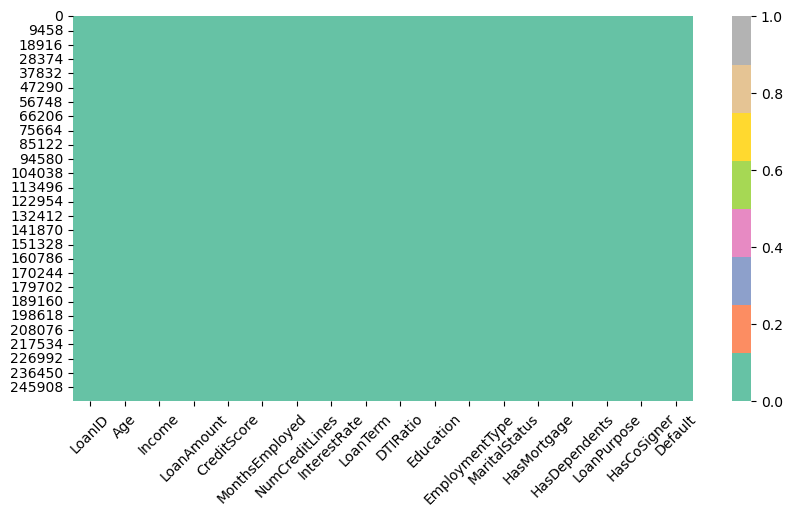

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data= data.isnull(), cmap = "Set2", vmin = 0, vmax =1)
plt.xticks(rotation = 45)
plt.show();

In [ ]:
import missingno as msno

<Axes: >

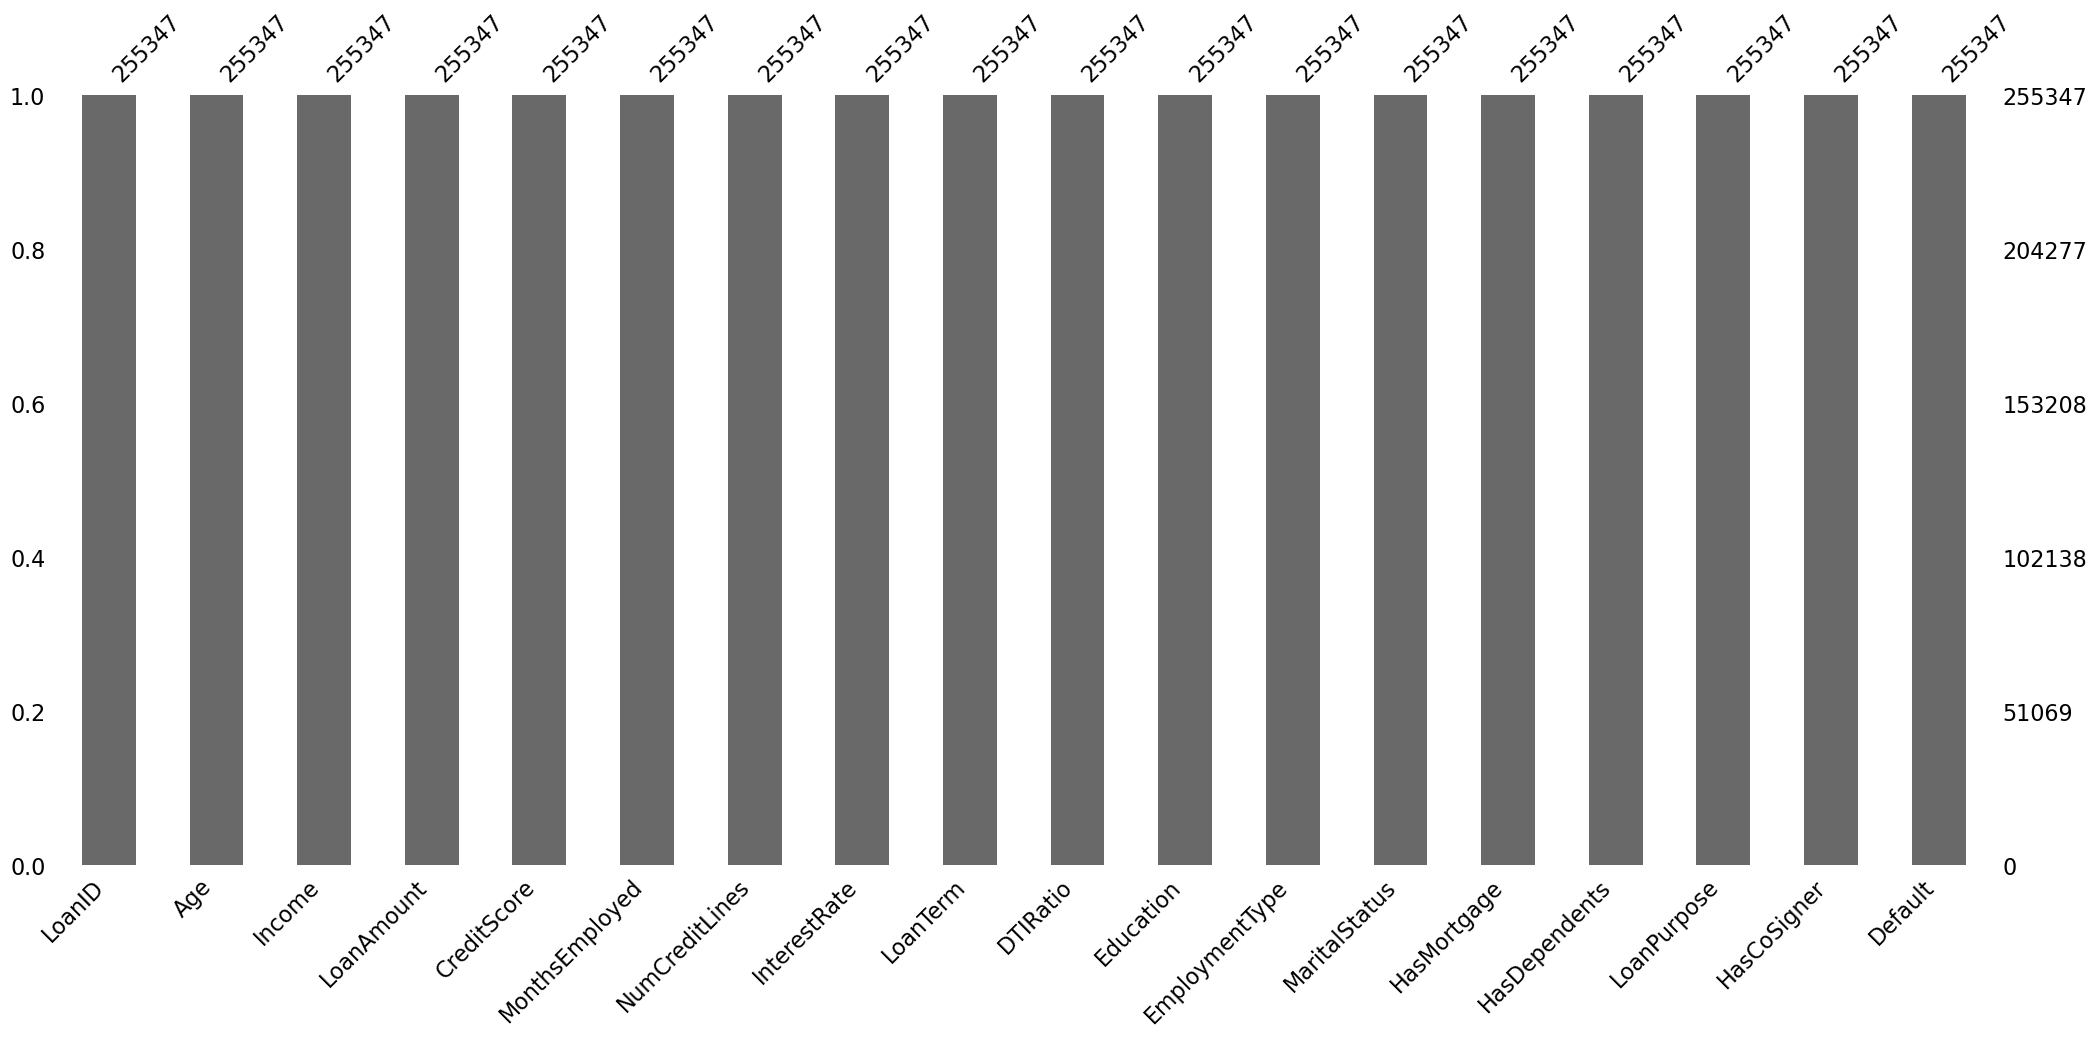

In [ ]:
msno.bar(data)

In [ ]:
# Method 1:
# If you want to drop rows or columns with missing values:
# Drop columns with too many missing values (e.g., > 30%)
data = data.dropna(axis=1, thresh=int(0.3 * len(data)))

In [ ]:
# Method 2:
# Fill numerical columns with the median
data.fillna(data.median(), inplace=True)
# Fill categorical columns with the mode
data.fillna(data.mode().iloc[0], inplace=True)

### Check for duplicate data

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

In [ ]:
# If duplicates exist, remove them
data = data.drop_duplicates()

### DROP IRRELEVANT FEATURE

In [ ]:
data = data.drop(["LoanID"], axis =1)

In [ ]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


## Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics for categorical columns
data.describe(include=['object'])

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [ ]:
# Summary statistics for categorical columns
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Numerical data EDA

In [ ]:
numerical_df = data.select_dtypes(exclude = ["object"])

In [ ]:
numerical_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


### Univariate analysis

In [ ]:
data.head(1)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


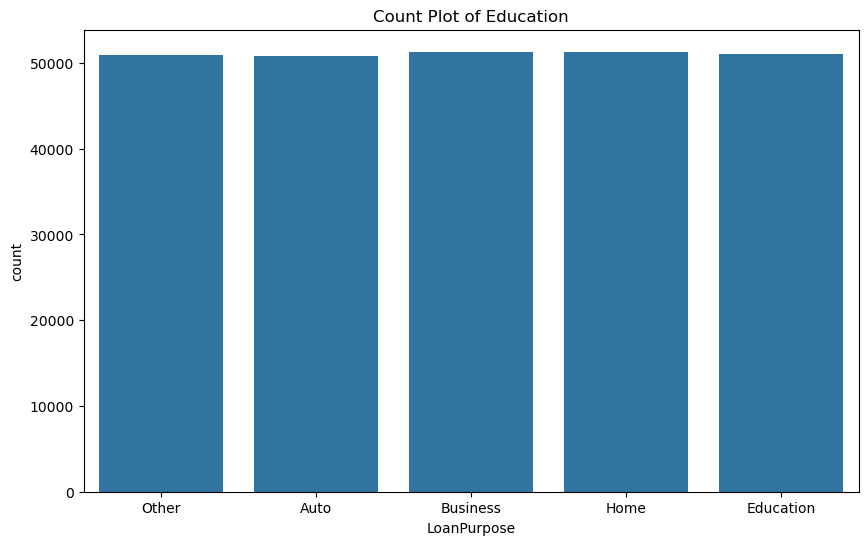

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="LoanPurpose", data=data)
plt.title(f'Count Plot of {"Education"}')
plt.show()

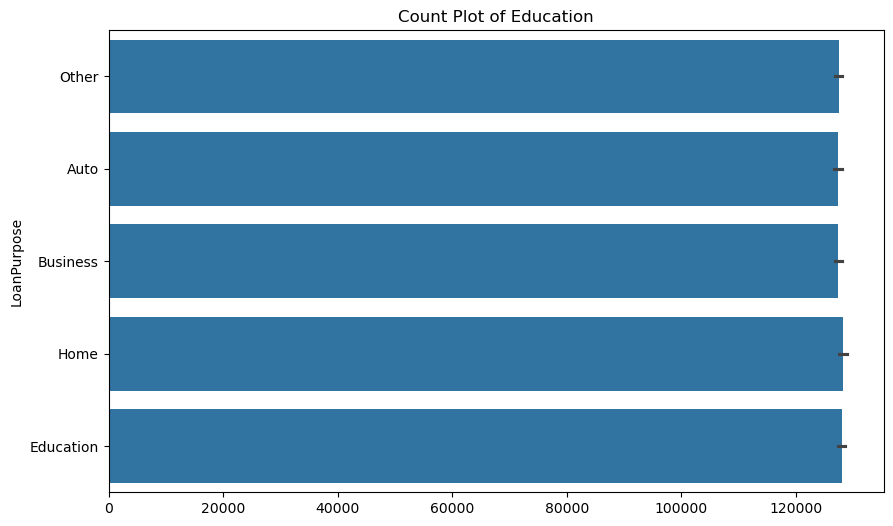

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data["LoanPurpose"])
plt.title(f'Count Plot of {"Education"}')
plt.show()

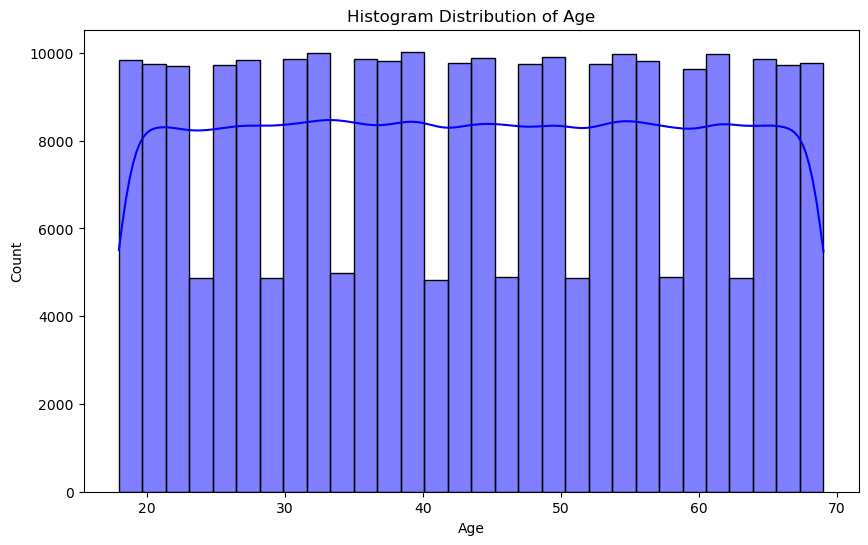

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data["Age"], kde=True, bins=30, color='blue')
plt.title(f'Histogram Distribution of {"Age"}')
plt.show()

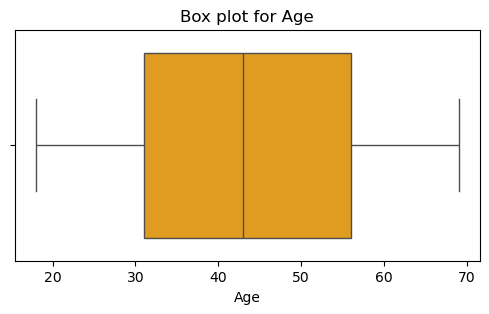

In [ ]:
plt.figure(figsize = (6,3))
sns.boxplot(data = numerical_df["Age"], orient = "h", color = "orange")
plt.xlabel("Age")
plt.title("Box plot for Age");

Text(0.5, 1.0, 'Box plot for age')

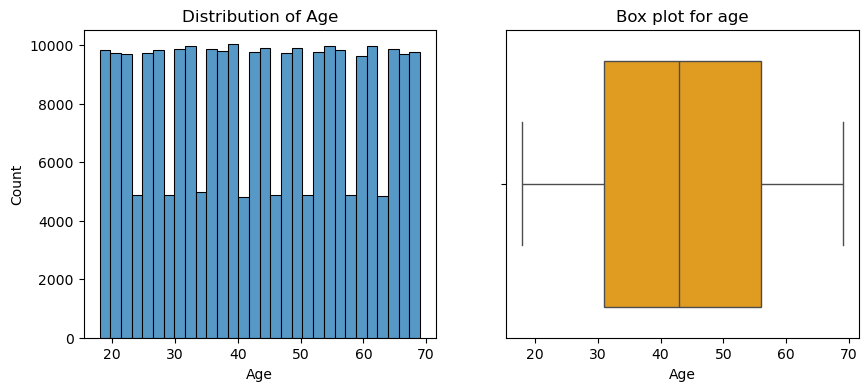

In [ ]:
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize = (10,4))

sns.histplot(data = numerical_df["Age"], bins=30, ax=axes[0])
axes[0].set_title("Distribution of Age")

sns.boxplot(data = numerical_df["Age"], orient="h", color="Orange", ax = axes[1])
axes[1].set_title("Box plot for age")

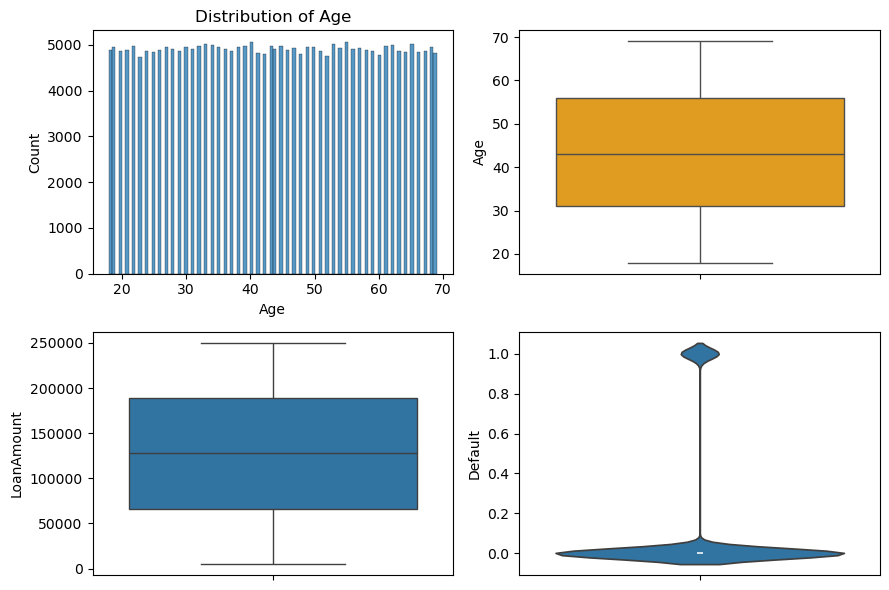

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (9,6))

sns.histplot(data = numerical_df["Age"], bins = 100, ax= axes[0,0])
axes[0,0].set_title("Distribution of Age")

sns.boxplot(data = numerical_df["Age"], color = "orange", ax=axes[0,1])
# axes[0,1].set_title("Box plot for age")

sns.boxplot(data["LoanAmount"], ax=axes[1,0])
# sns.violinplot(data = numerical_df["Age"], color = "orange", ax=axes[1,0])
# axes[1,0].set_title("Box plot for age")

sns.violinplot(data["Default"], ax=axes[1,1])
# axes[1,1].set_title("Box plot for age")

plt.tight_layout()
plt.show()

**Distribution of Numerical features**

In [ ]:
numerical_cols = numerical_df.columns.to_list()

numerical_cols

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Default']

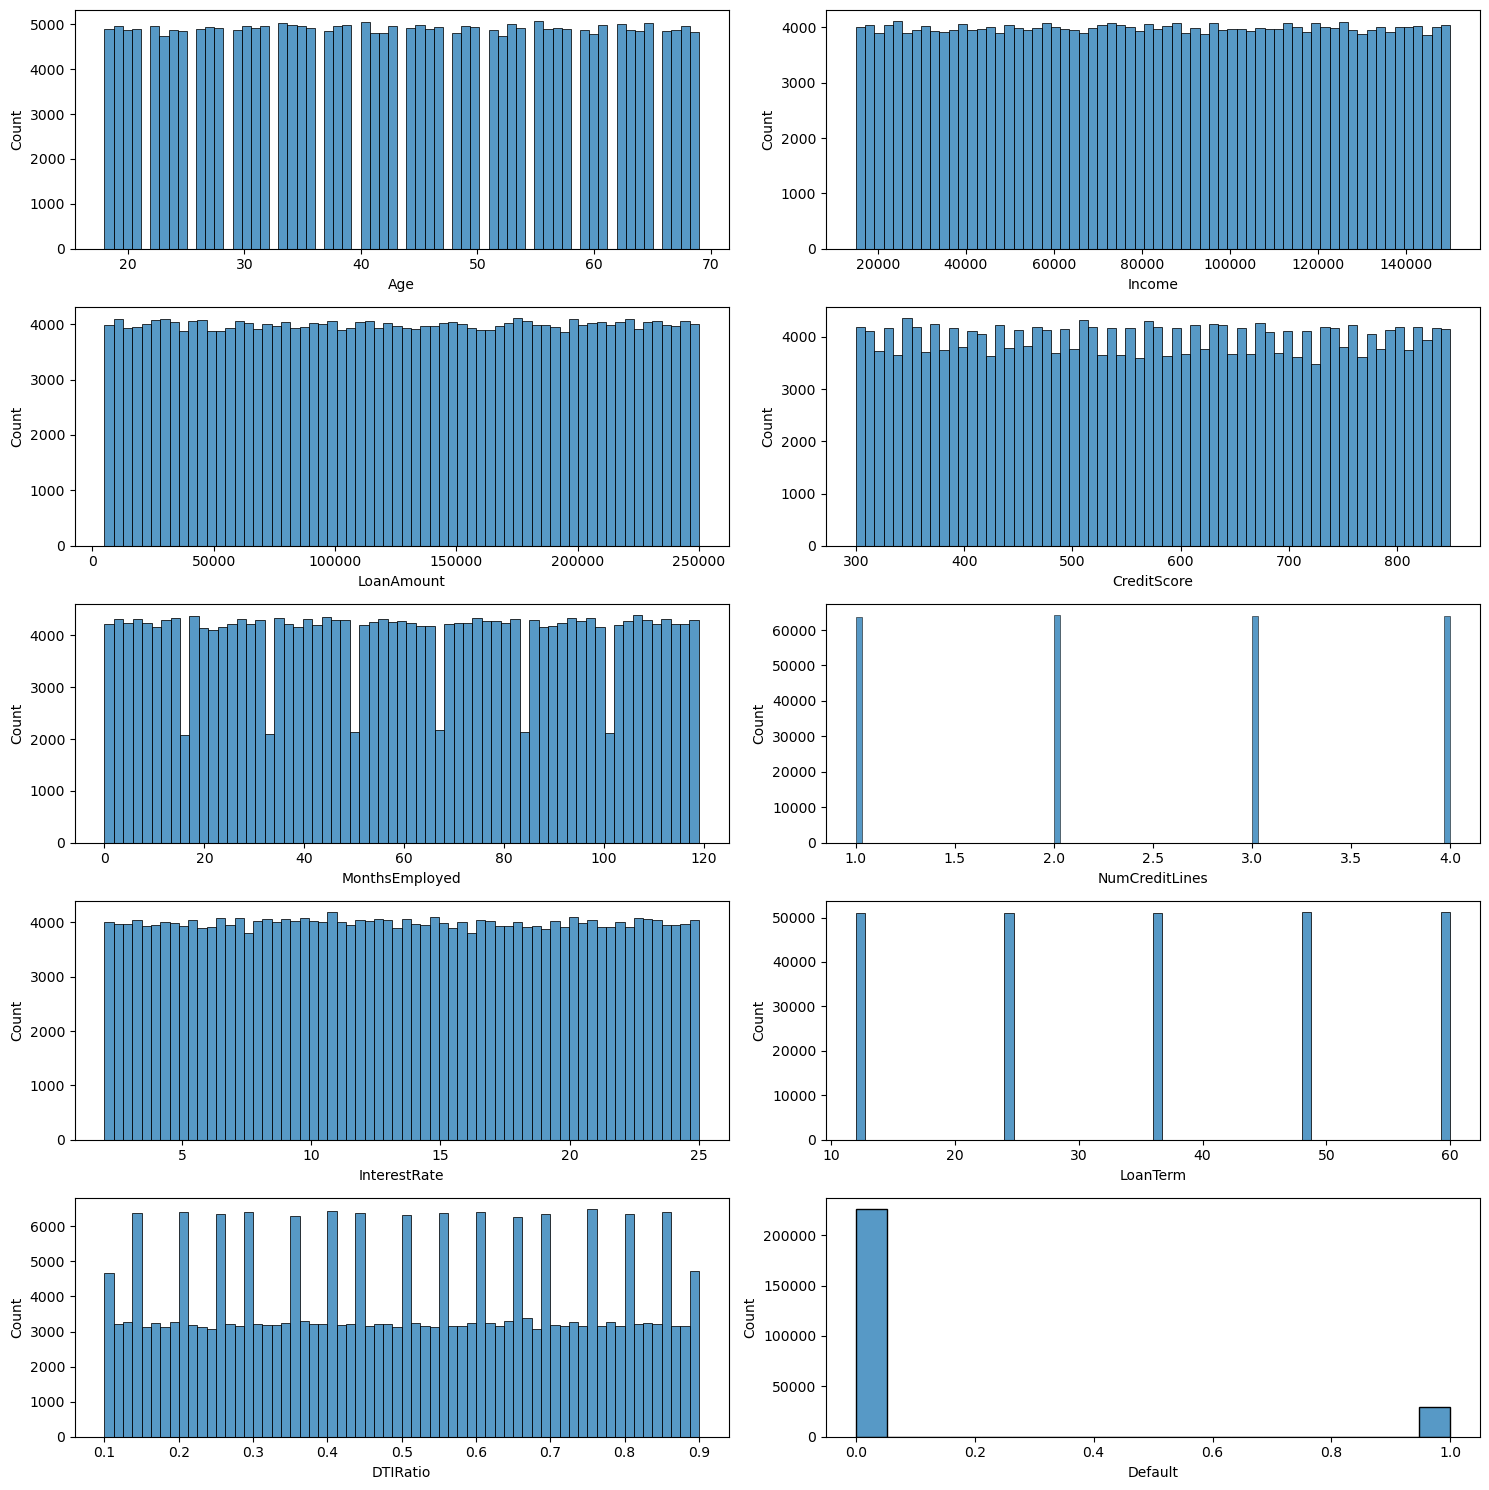

In [ ]:
fig, axes = plt.subplots(nrows= 5, ncols=2, figsize = (15,15))

position = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.histplot(data = numerical_df[name_of_feature], ax = position[index])

plt.tight_layout()

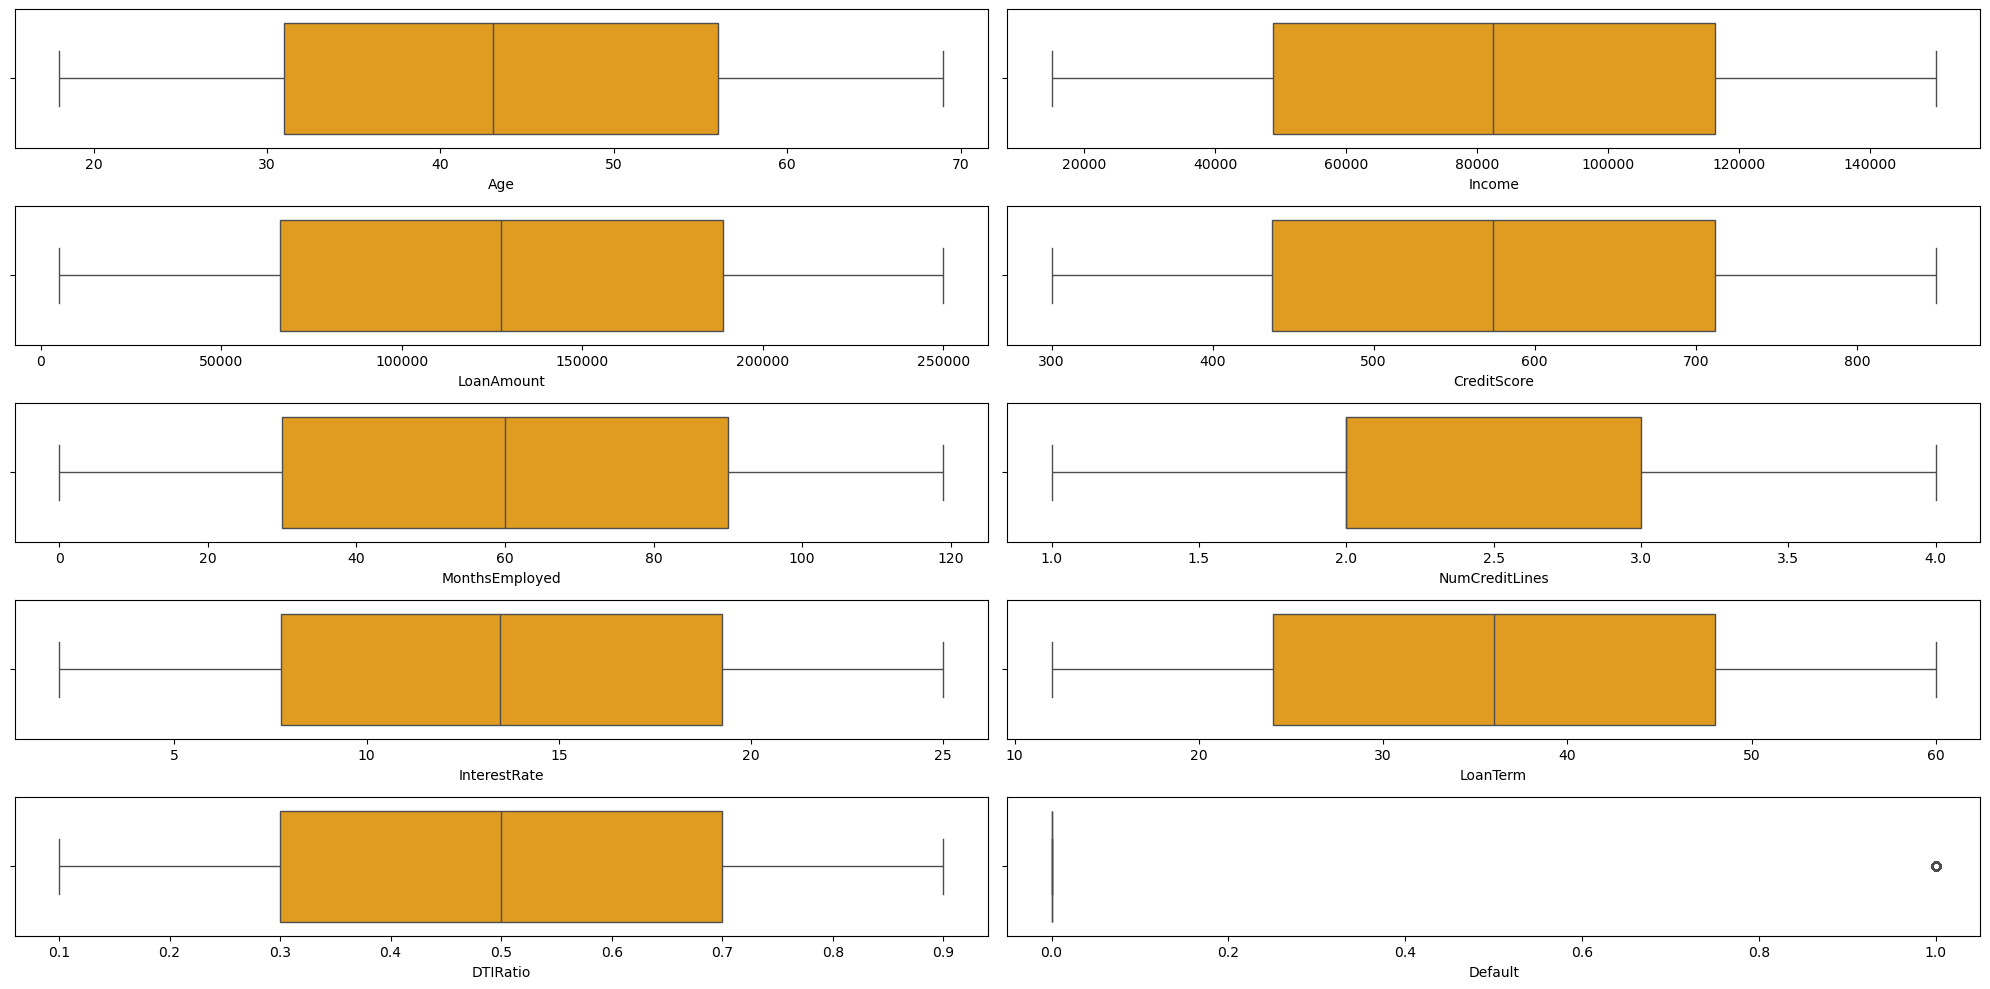

In [ ]:
n_features  =len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,10))

position  = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.boxplot(data = data[name_of_feature], ax = position[index], orient = "h", color = "orange")

plt.tight_layout()

**Alternative method**

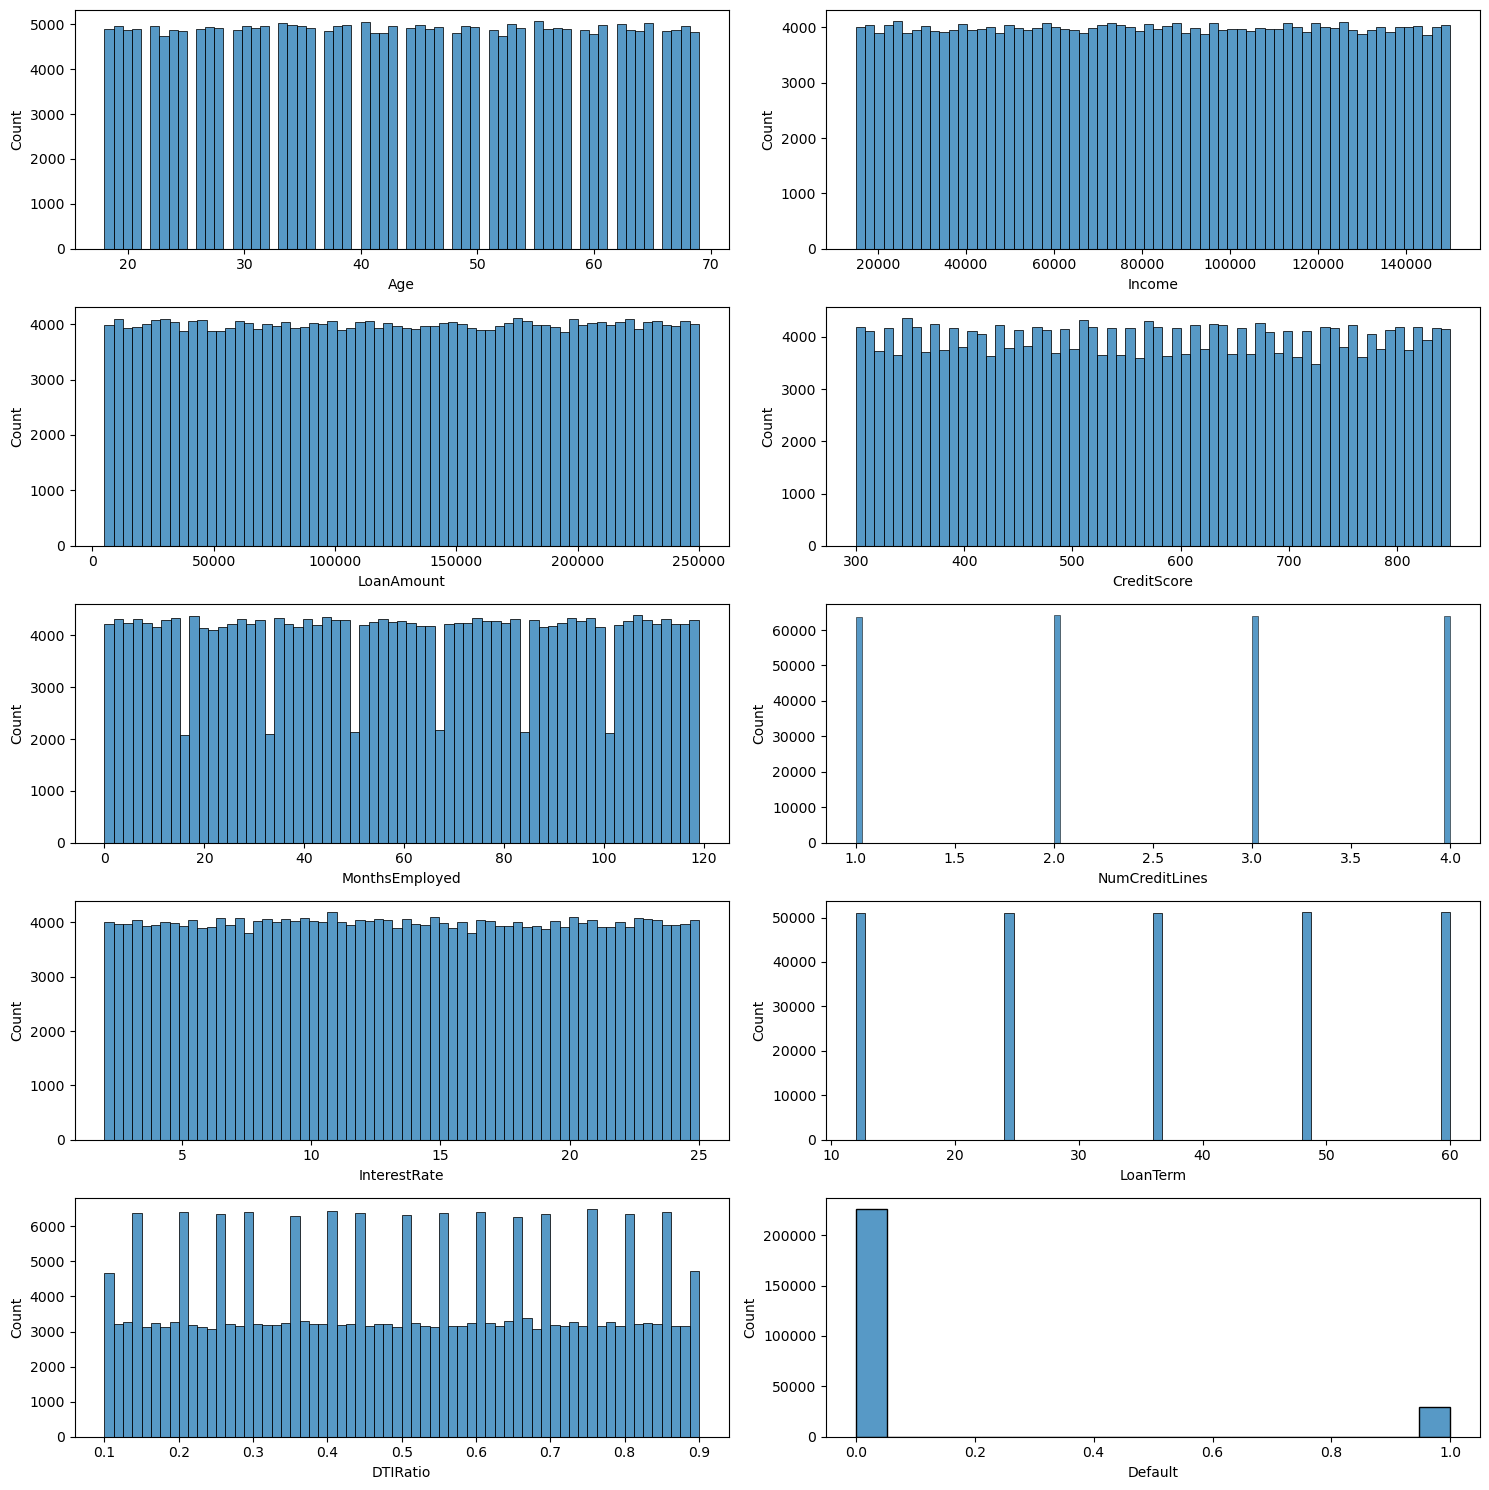

In [ ]:
num_of_features = len(numerical_cols)
num_cols = 2
num_rows = (num_of_features + 1)//num_cols

fig, axes = plt.subplots(nrows= num_rows, ncols=num_cols, figsize = (15,15))

position = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.histplot(data = numerical_df[name_of_feature], ax = position[index])

plt.tight_layout()

### Bivariate analysis
Bivariate analysis examines the relationship between two variables, typically with one independent variable and one dependent variable.

Categorical vs Categorical:
- We can use stacked bar plots or grouped bar plots.

Numerical vs Categorical:
- We can use box plots, violin plots, or swarm plots.

Numerical vs Numerical:
- We can use scatter plots and compute the correlation.

In [ ]:
cat_data = data.select_dtypes(include="object")
cat_data.head()

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,V2KKSFM3UN,High School,Full-time,Married,No,No,Business,No
4,EY08JDHTZP,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


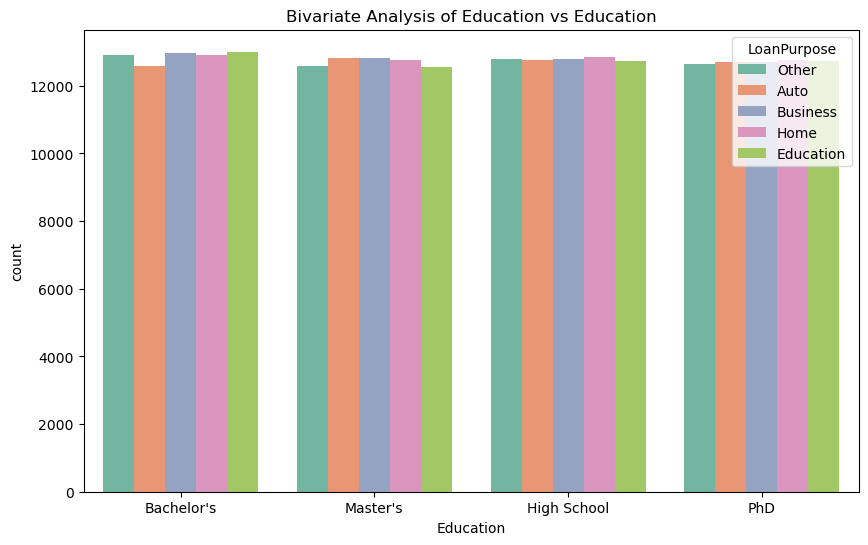

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Education", hue="LoanPurpose", data=cat_data, palette='Set2')
plt.title(f'Bivariate Analysis of {"Education"} vs {"Education"}')
plt.show()

/var/folders/1d/f83cr705733b6z2b1hm6kbt00000gn/T/ipykernel_91354/4029094914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="MaritalStatus", y="NumCreditLines", data=data, palette='Set2')


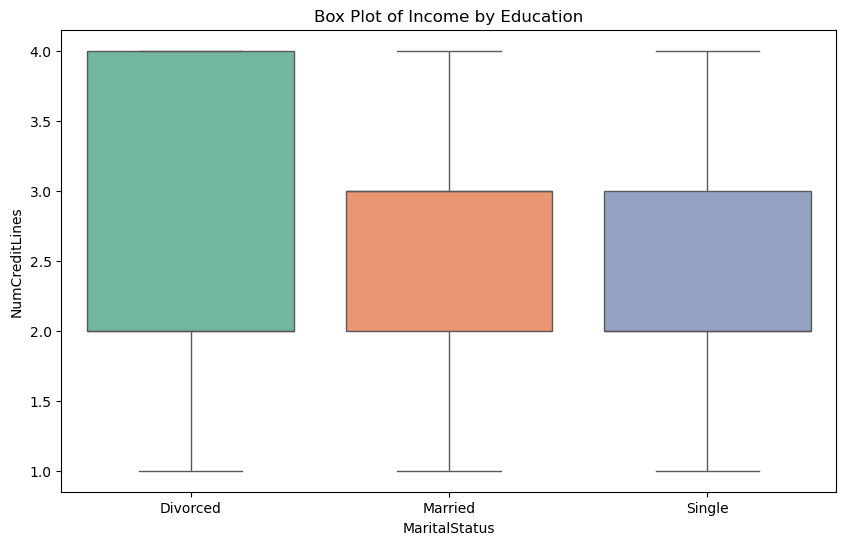

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="MaritalStatus", y="NumCreditLines", data=data, palette='Set2')
plt.title(f'Box Plot of {"Income"} by {"Education"}')
plt.show()

#### Correlations

In [ ]:
numerical_df.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


<Axes: >

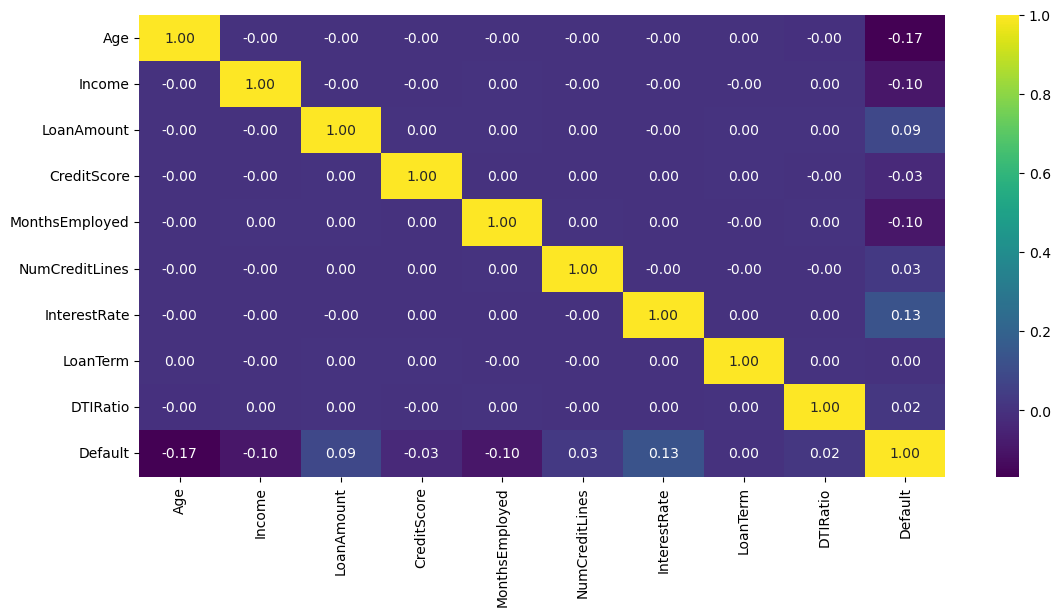

In [ ]:
plt.figure(figsize = (13,6))
sns.heatmap(data=numerical_df.corr(), cmap = "viridis", annot=True, fmt=".2f")

# Categorical Data EDA

In [ ]:
categorical_df = data.select_dtypes(include = "object")

In [ ]:
categorical_df.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [ ]:
categorical_df["Education"].nunique()

4

In [ ]:
cat_columns = categorical_df.columns.to_list()

for feature in cat_columns:
    print(f"{feature} -----------------> {categorical_df[feature].nunique()}")

Education -----------------> 4
EmploymentType -----------------> 4
MaritalStatus -----------------> 3
HasMortgage -----------------> 2
HasDependents -----------------> 2
LoanPurpose -----------------> 5
HasCoSigner -----------------> 2


In [ ]:
for feature in cat_columns:
    print(feature)
    print(categorical_df[feature].unique())
    print("\n")

Education
["Bachelor's" "Master's" 'High School' 'PhD']


EmploymentType
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']


MaritalStatus
['Divorced' 'Married' 'Single']


HasMortgage
['Yes' 'No']


HasDependents
['Yes' 'No']


LoanPurpose
['Other' 'Auto' 'Business' 'Home' 'Education']


HasCoSigner
['Yes' 'No']




**Univariate analysis**

In [ ]:
education_count = categorical_df["Education"].value_counts()

In [ ]:
categorical_df["Education"].value_counts().index

Index(['Bachelor's', 'High School', 'Master's', 'PhD'], dtype='object')

In [ ]:
categorical_df["Education"].value_counts().values

array([64366, 63903, 63541, 63537])

<Axes: xlabel='None'>

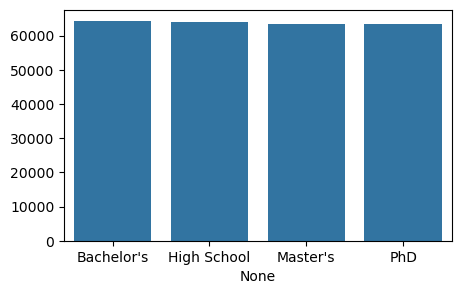

In [ ]:
plt.figure(figsize = (5,3))
sns.barplot(x= education_count.index, y = education_count.values)

In [ ]:
cat_columns

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

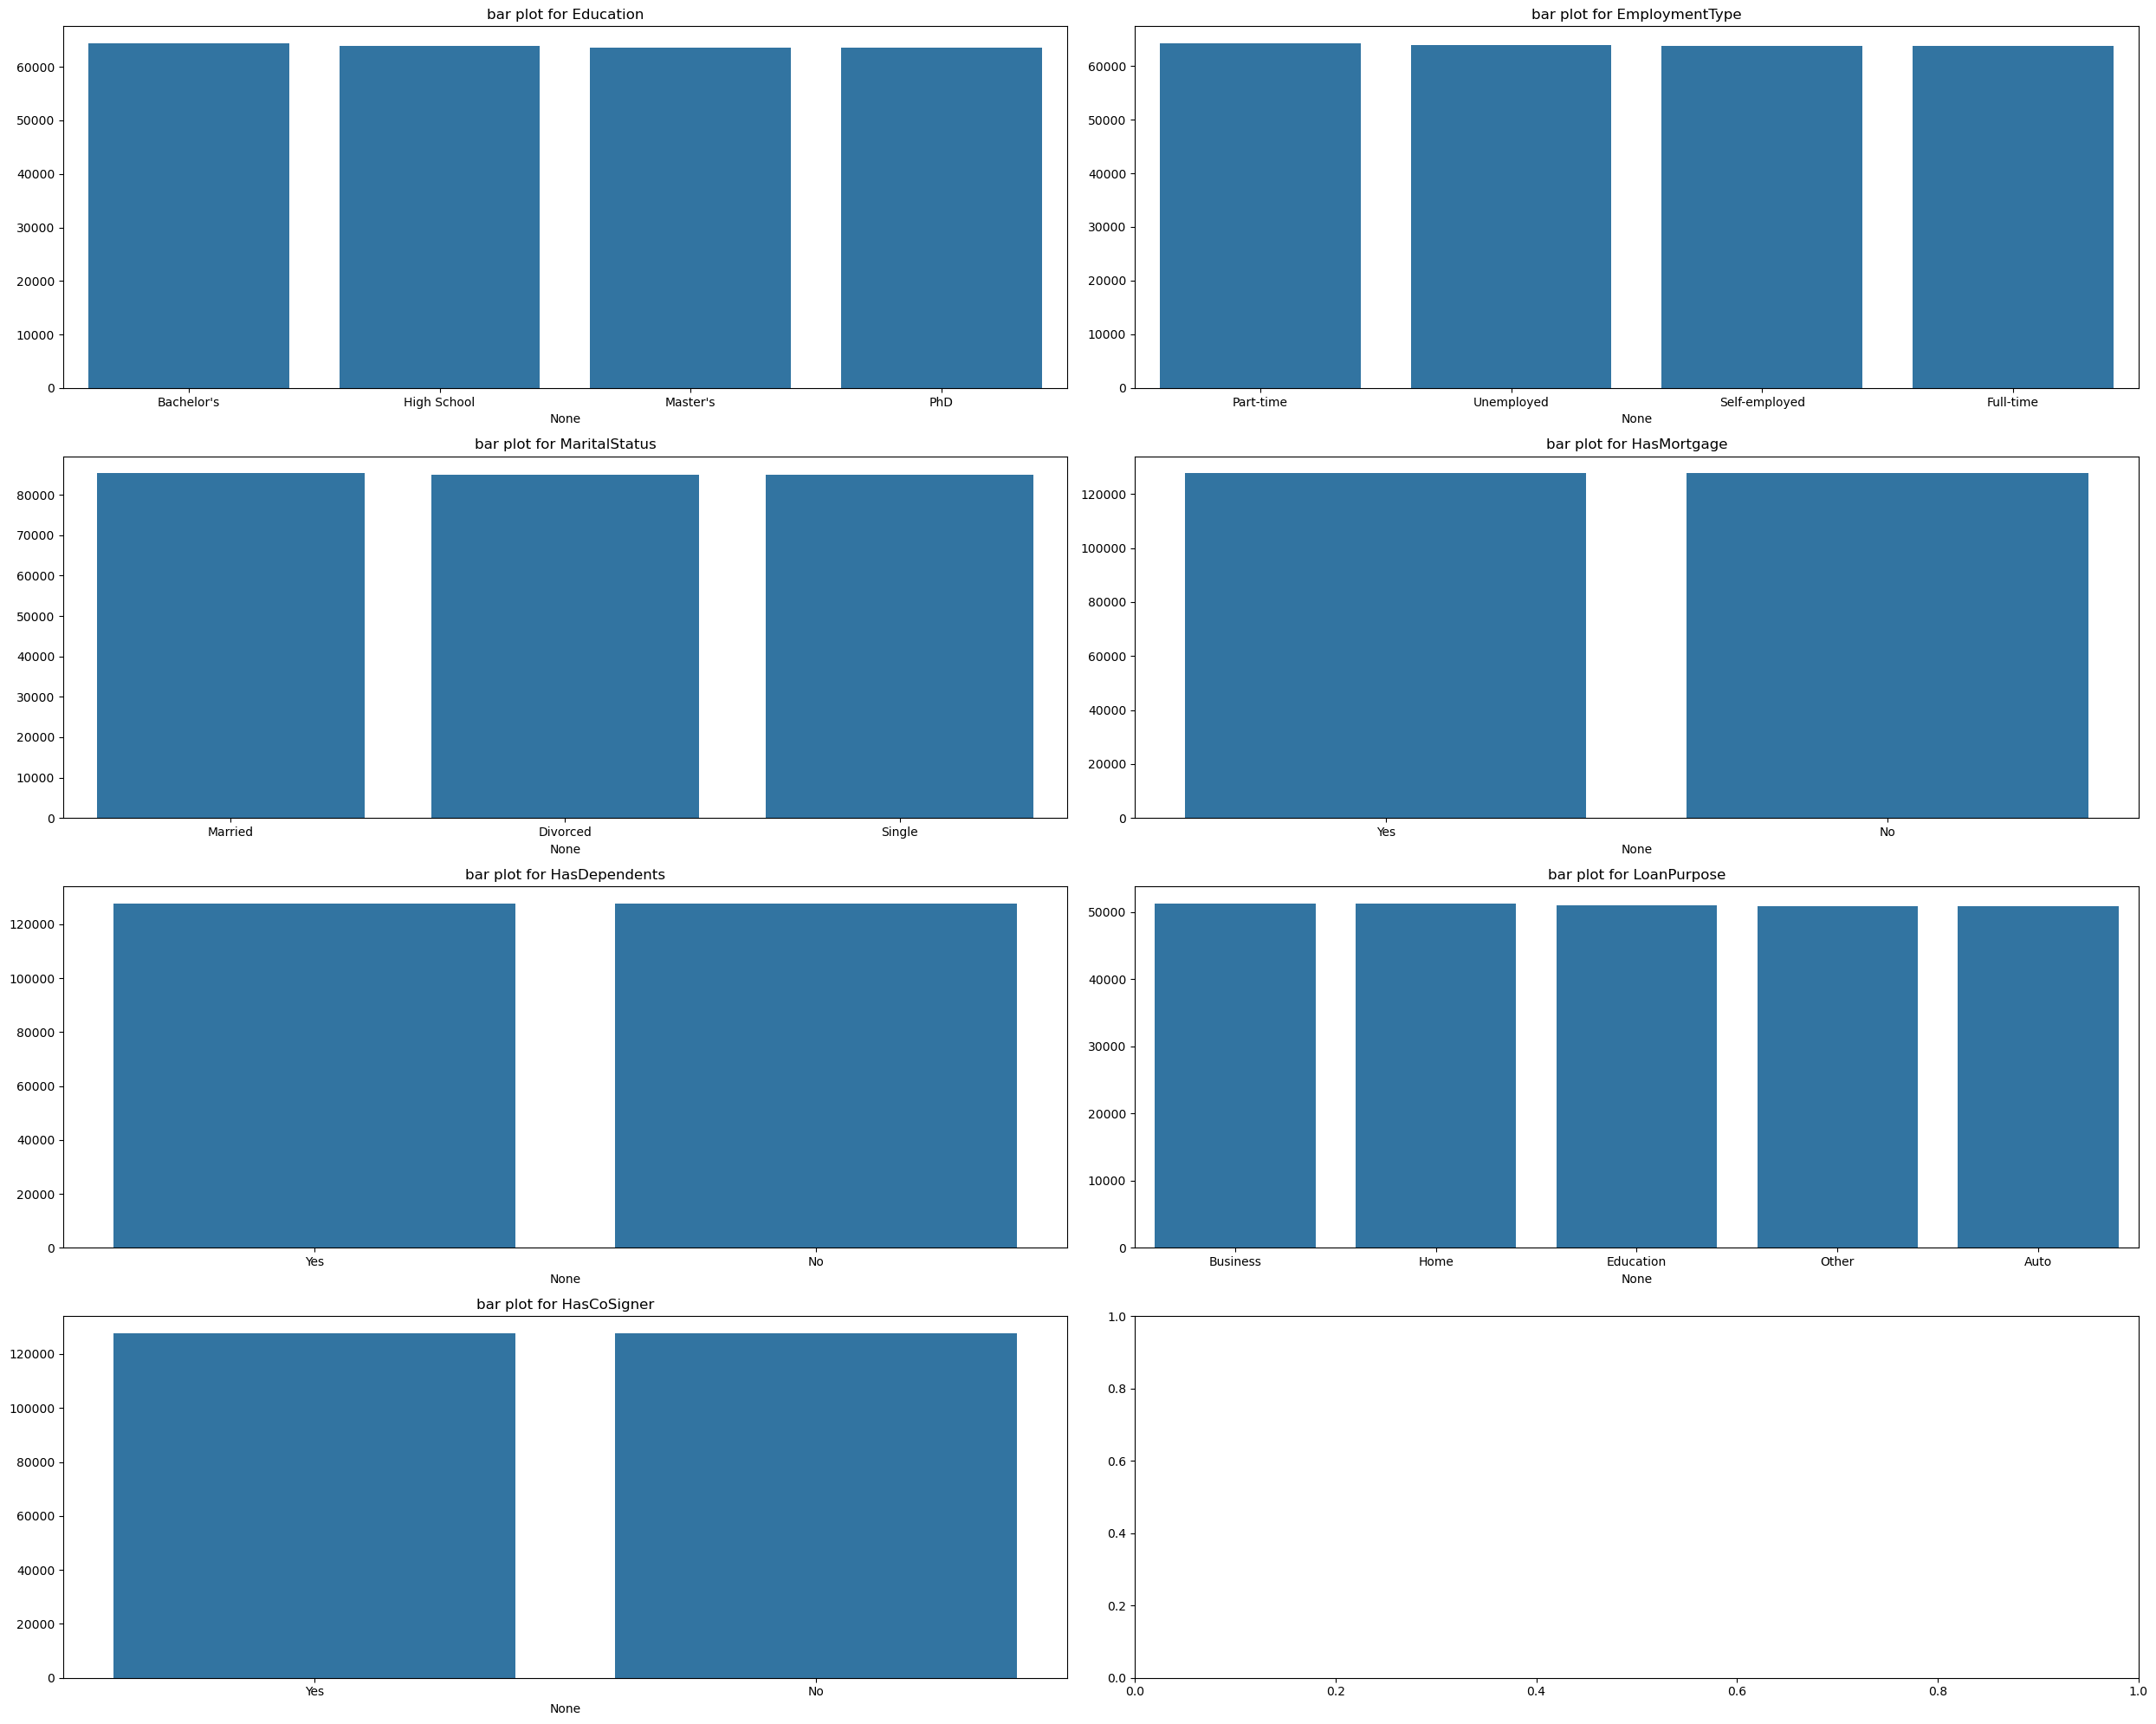

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (25,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.barplot(x = categorical_df[feature].value_counts().index, y =categorical_df[feature].value_counts().values,
               ax = position[index])
    position[index].set_title(f"bar plot for {feature}")

plt.tight_layout()

### Bivariate analysis

<Axes: xlabel='Education', ylabel='count'>

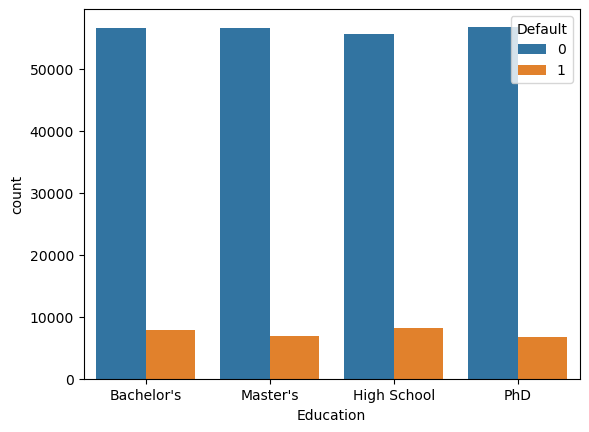

In [ ]:
sns.countplot(data = categorical_df, x = "Education", hue= data["Default"])

In [ ]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


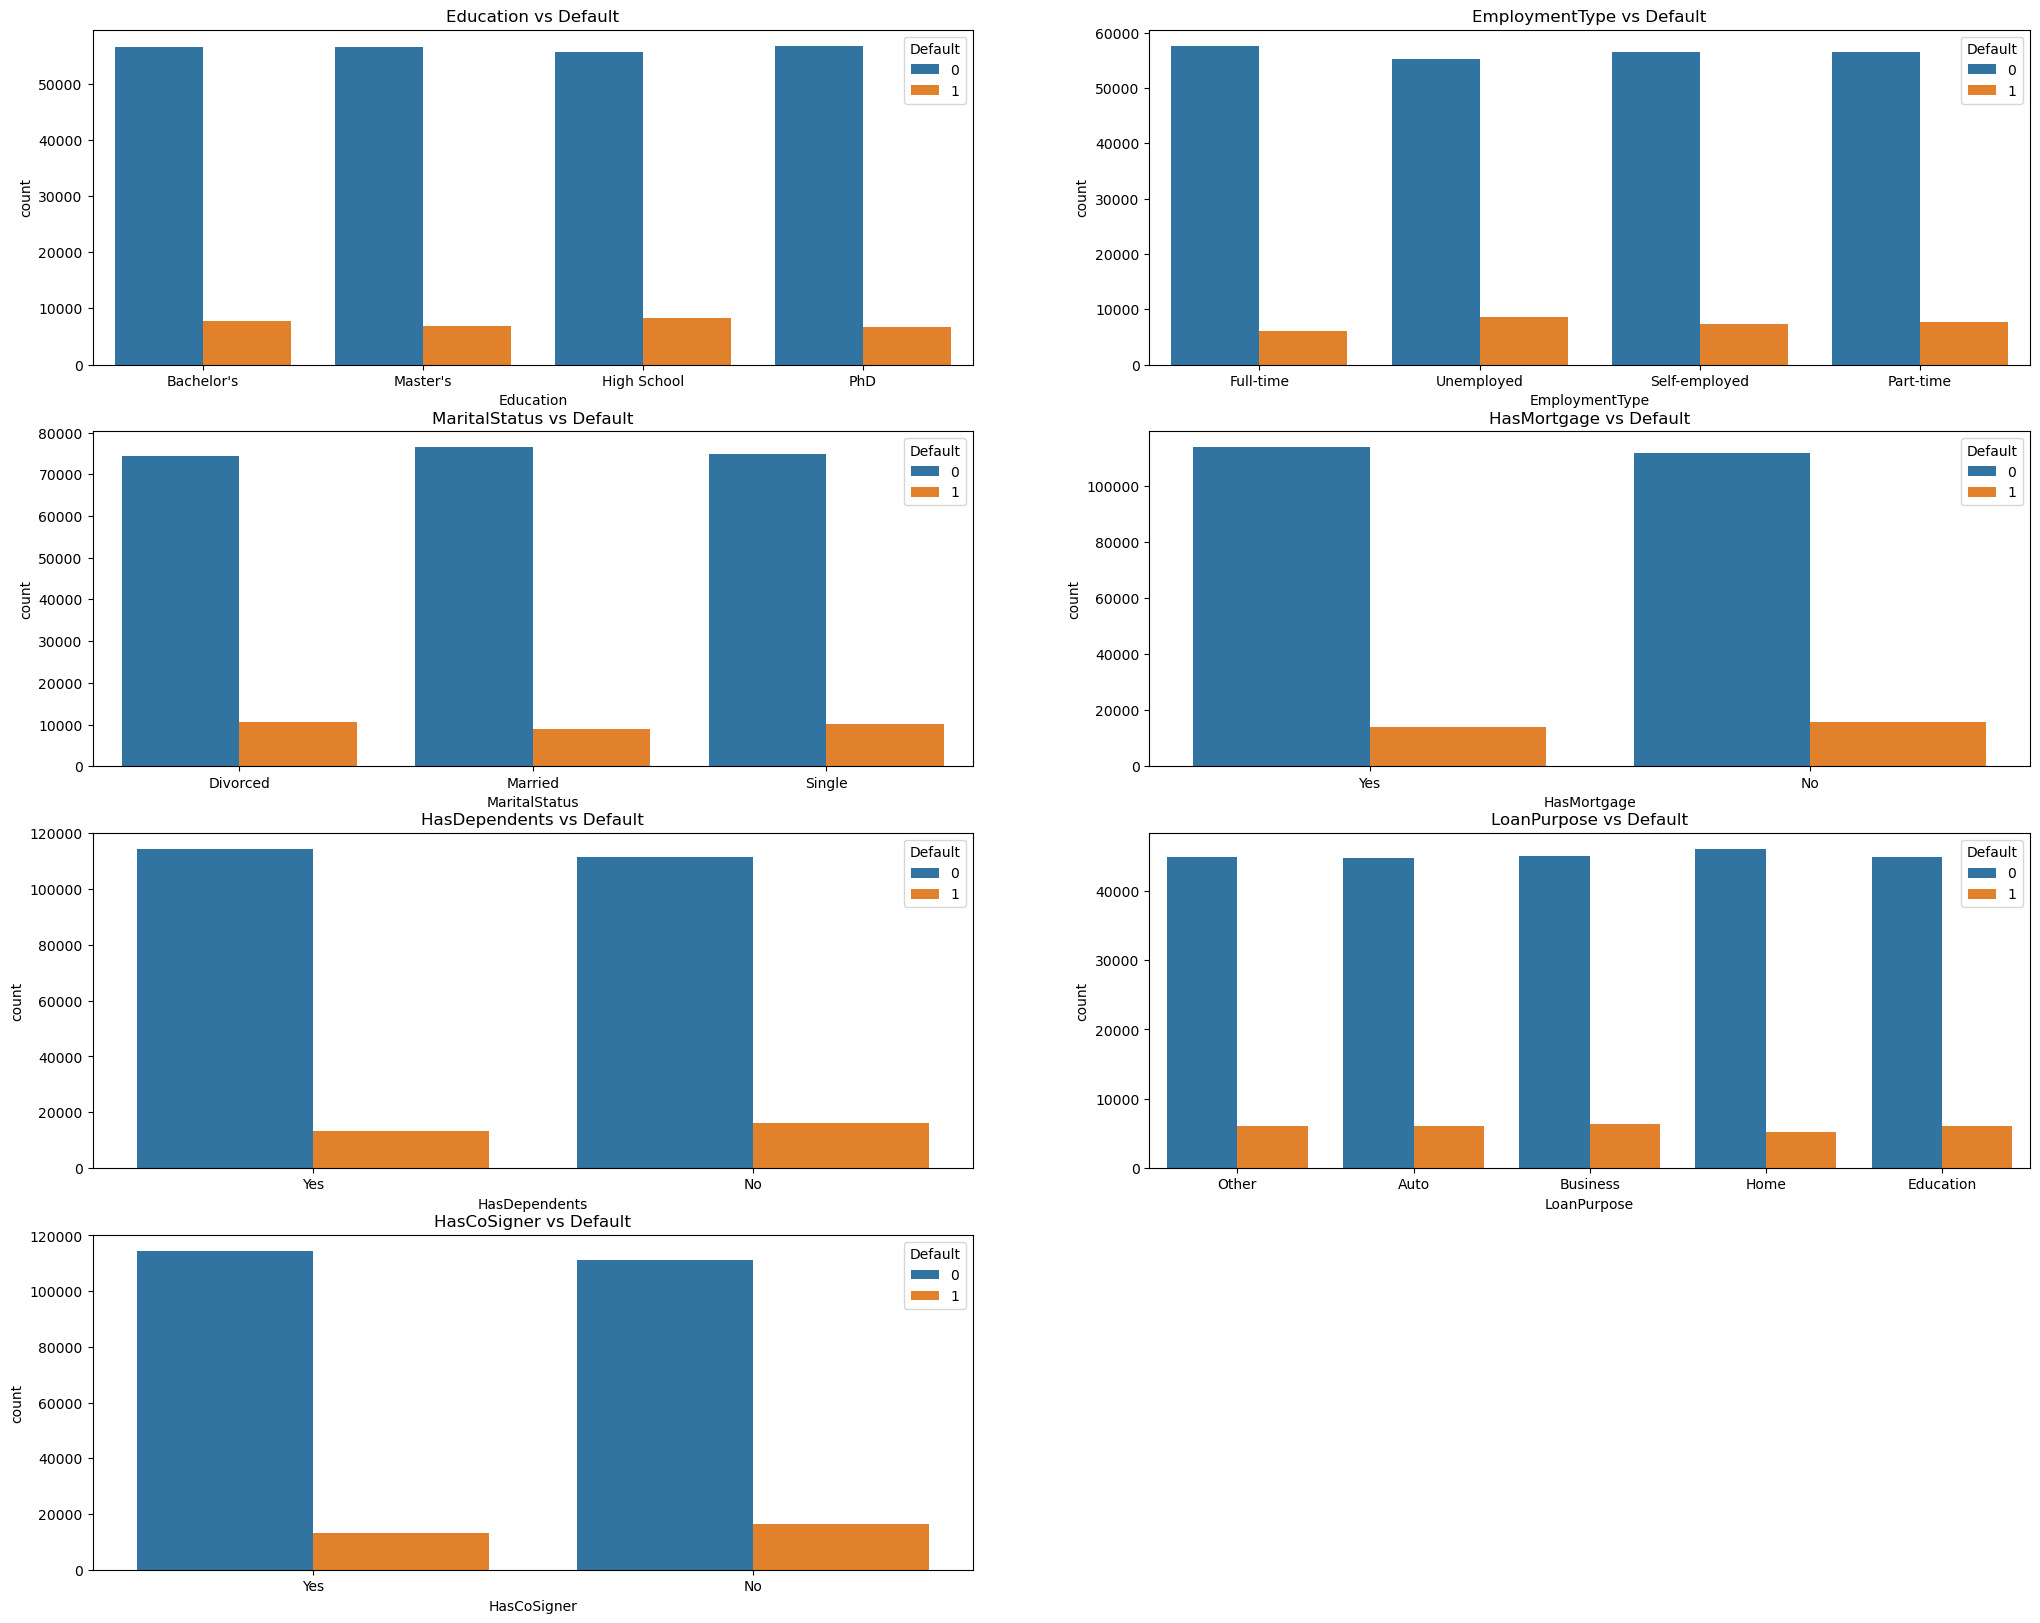

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (25,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.countplot(data = categorical_df, x  =feature, hue = data["Default"], ax = position[index])
    position[index].set_title(f"{feature} vs Default")

for ax in position[7:]:
    fig.delaxes(ax)

In [ ]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### Multivariate Analysis

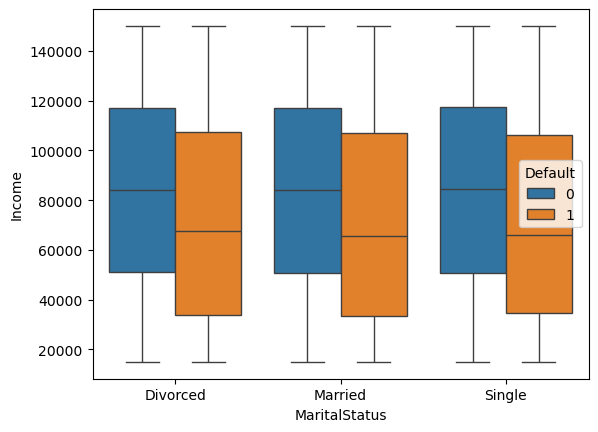

In [ ]:
# Box plot with hue
sns.boxplot(x="MaritalStatus", y="Income", hue="Default", data=data)
plt.show()

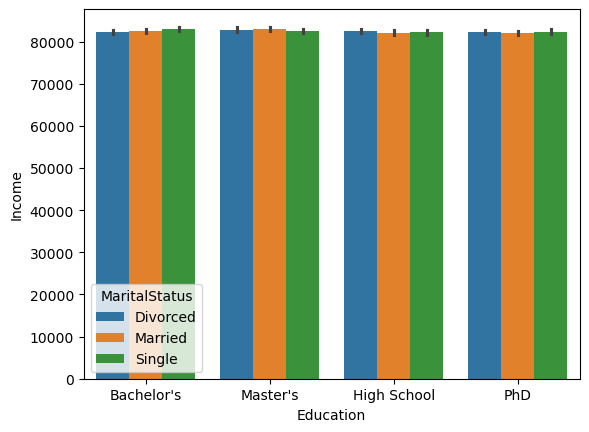

In [ ]:
sns.barplot(x="Education", y="Income", hue="MaritalStatus", data=data)
plt.show()

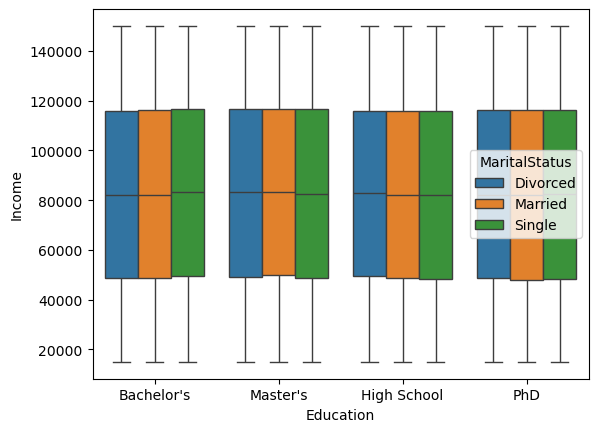

In [ ]:
sns.boxplot(x="Education", y="Income", hue="MaritalStatus", data=data)
plt.show()